#**Cargando el dataset del ECG**




In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import firwin, lfilter
from tqdm import tqdm
import pandas as pd
import csv

from scipy import signal

Cargar el archivo .npz

In [ ]:
with np.load('Dataset_ECG_save.npz') as data:
    # Recuperar los arrays del archivo y reconstruir el diccionario
    Dataset_ECG = {key: data[key] for key in data.keys()}
Dataset_ECG

{'base': array([[570., 568., 563., ..., 521., 527., 530.],
        [531., 531., 529., ..., 502., 506., 510.],
        [513., 514., 515., ..., 508., 517., 521.],
        ...,
        [692., 713., 732., ...,   0.,   0.,   0.],
        [533., 532., 531., ...,   0.,   0.,   0.],
        [540., 539., 537., ...,   0.,   0.,   0.]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])}

In [ ]:
datos_totales=Dataset_ECG["base"]
datos_totales.shape
#Los 50 primeros son basal

(150, 1000)

##Visualizando toda la Señal para basal en el dominio del Tiempo

Text(0, 0.5, 'mV')

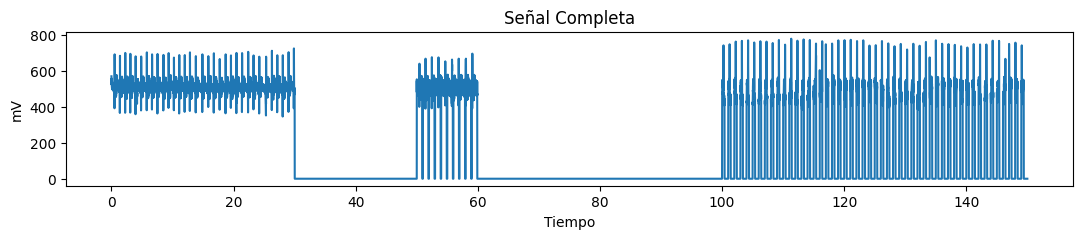

In [ ]:
#Mostrar datos en el tiempo
dat=np.reshape(datos_totales,-1)

#Frecuencia de muestreo del dispositivo de adquisición
Fs = 1000 
Ts=1/Fs
n = np.arange(0,dat.shape[0])  # t = n*Ts ; Vector de numeros de datos
t = n*Ts #VECTOR TIEMPO 
plt.figure(figsize=(13,2)) #Modificamos el tamaño de la gráfica
plt.plot(t, dat)
plt.title("Señal Completa")
plt.xlabel('Tiempo')
plt.ylabel('mV')

### Cortando señal

Text(0, 0.5, 'mV')

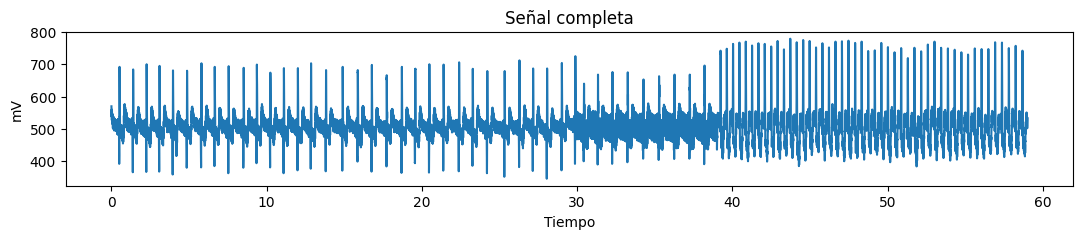

In [ ]:
#DEBIDO A QUE A PARTIR DE SON 3000 DATOS DE LOS 5000
Datos = dat[np.nonzero(dat)]
Ts=1/1000
n = np.arange(0,Datos.shape[0])  # t = n*Ts ; Vector de numeros de datos
t = n*Ts #VECTOR TIEMPO 
plt.figure(figsize=(13,2)) #Modificamos el tamaño de la gráfica
plt.plot(t, Datos)
plt.title("Señal completa")
plt.xlabel('Tiempo')
plt.ylabel('mV')

Visualización del ecg por cada estado (Basal, Respiración, Post Ejercicio)

Text(0, 0.5, 'mV')

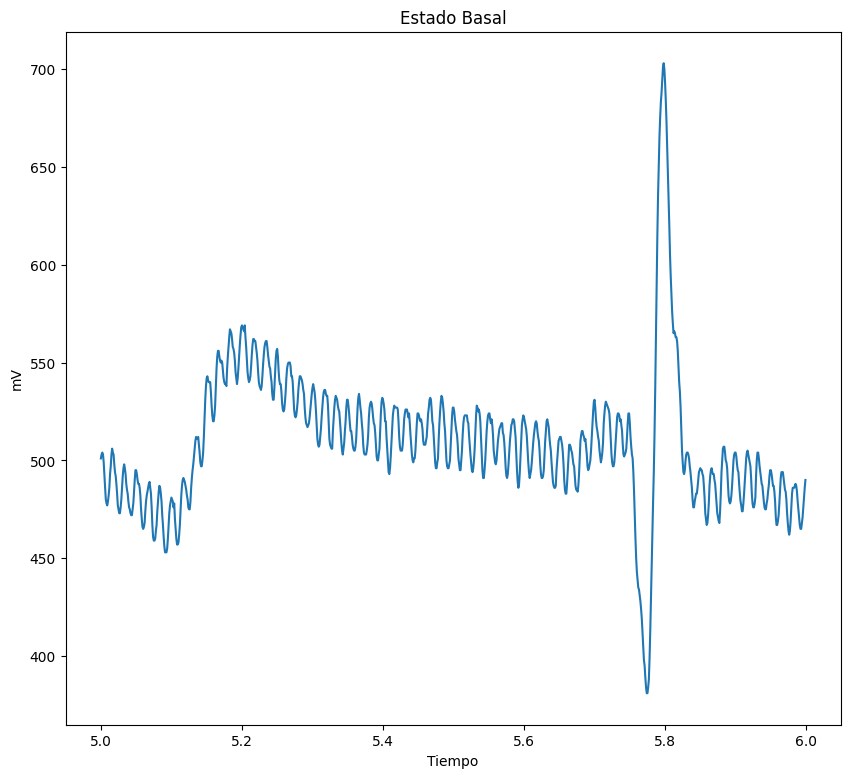

In [ ]:
plt.figure(figsize=(10,9)) #Modificamos el tamaño de la gráfica
plt.plot(t[5000:6000], Datos[5000:6000])
plt.title("Estado Basal")
plt.xlabel('Tiempo')
plt.ylabel('mV')

Text(0, 0.5, 'mV')

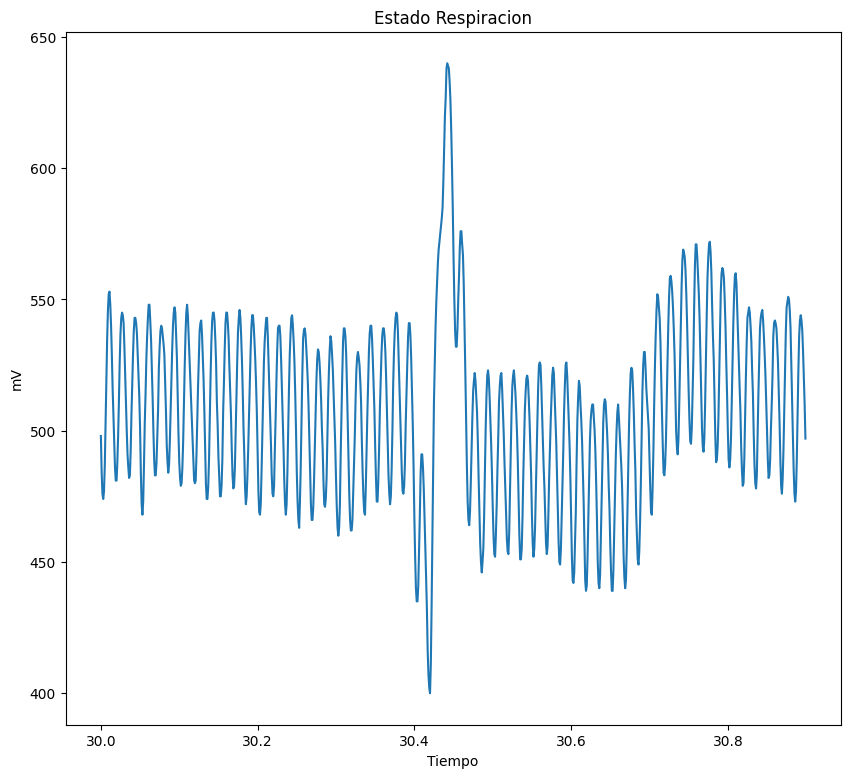

In [ ]:
plt.figure(figsize=(10,9)) #Modificamos el tamaño de la gráfica
plt.plot(t[30000:30900], Datos[30000:30900])
plt.title("Estado Respiracion")
plt.xlabel('Tiempo')
plt.ylabel('mV')

Text(0, 0.5, 'mV')

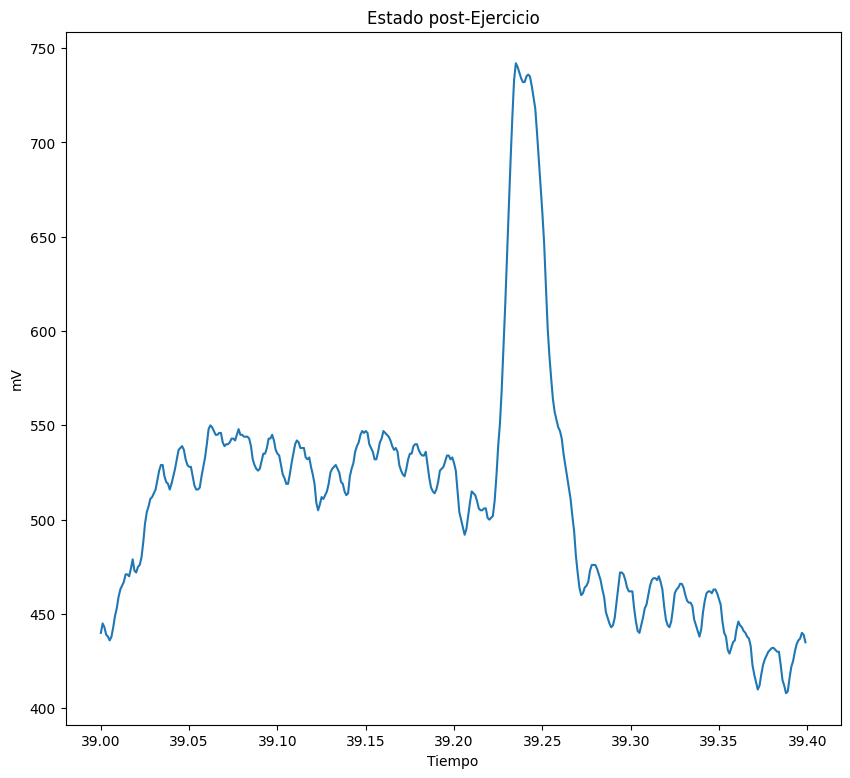

In [ ]:
plt.figure(figsize=(10,9)) #Modificamos el tamaño de la gráfica
plt.plot(t[39000:39400], Datos[39000:39400])
plt.title("Estado post-Ejercicio")
plt.xlabel('Tiempo')
plt.ylabel('mV')

## Dominio de la frecuencia de la señal

Text(0, 0.5, 'FFT (db)')

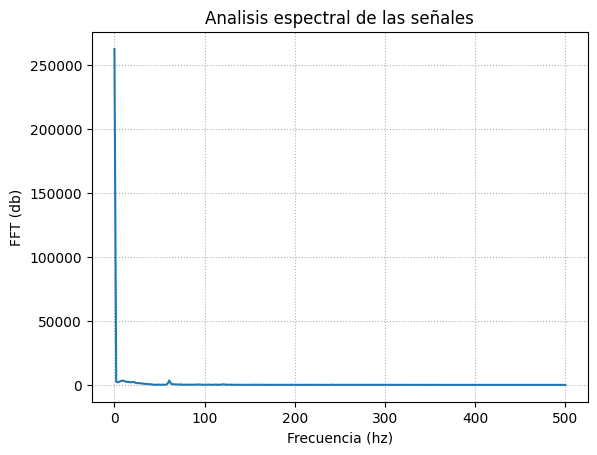

In [ ]:
N = 2**9
BASAL = np.fft.fft(Datos,N)
BASAL = BASAL[0:(N//2)]
BASALm = np.abs(BASAL)
BASALm = np.round(BASALm,3)
F = np.linspace(0, Fs/2, N//2)
plt.plot(F,BASALm)
plt.grid(linestyle = ":")
plt.title("Analisis espectral de las señales")
plt.xlabel("Frecuencia (hz)")
plt.ylabel("FFT (db)")

## Aplicando filtro FIR
Se aplicaran los valores otrogados en la guía, que en este caso es con una fc = 20 Hz

In [ ]:
#longitud de la ventana
M = 37
#frecuencia de corte en Hz
Fc = 20

#Frecuencia de corte en radianes
wc = 2*np.pi*Fc/Fs

# filtro fir
w = firwin(numtaps=M, cutoff=Fc, window='hamming', fs=Fs)
w = np.round(w,3)

In [ ]:
nm = np.arange(M)
W = np.fft.fft(w,N)
W = np.round(W[0:N//2],3)

#magnitud
Wm = np.abs(W)
Rx = Fc*np.ones([N//2])
Ry = np.linspace(0,1,N//2)

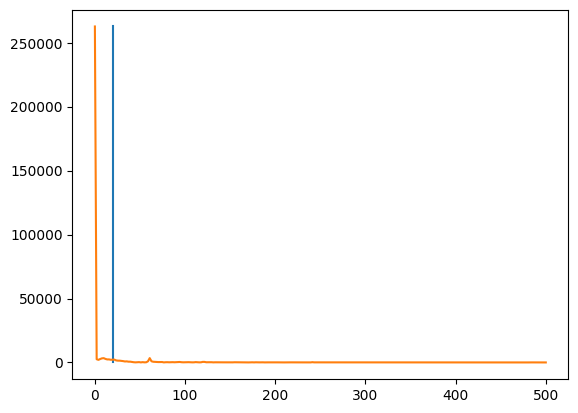

In [ ]:
Ry = np.linspace(0,np.max(BASALm),N//2) #el eje y

plt.plot(Rx,Ry)
plt.plot(F,BASALm)

In [ ]:
y = lfilter(w, np.array(1),Datos)
Y = np.fft.fft(y,N)
Y = np.round(Y[0:N//2],3)

Ym = np.abs(Y)



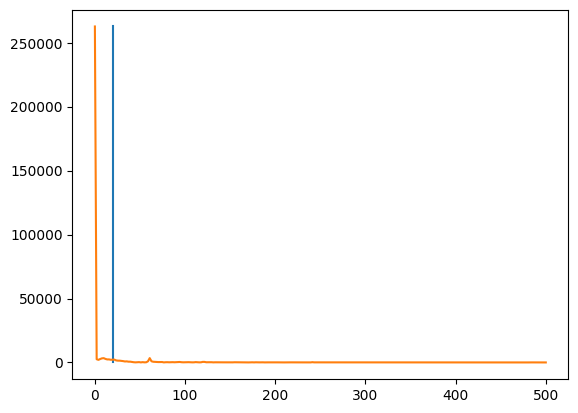

In [ ]:
Ry = np.linspace(0,np.max(BASALm),N//2) #el eje y

plt.plot(Rx,Ry)
plt.plot(F,BASALm)

### Visualización de la señal filtrada

Text(0, 0.5, 'mV')

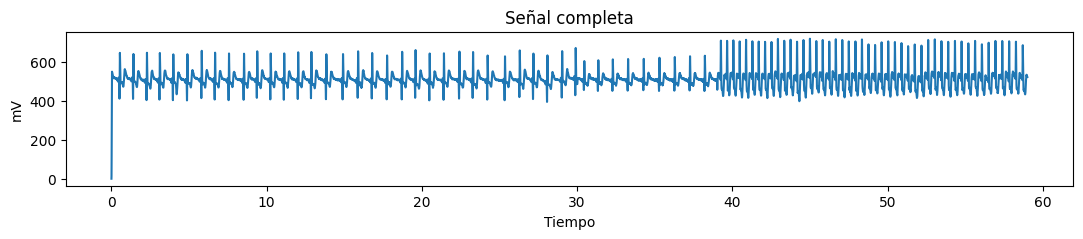

In [ ]:
plt.figure(figsize=(13,2)) #Modificamos el tamaño de la gráfica
plt.plot(t, y)
plt.title("Señal completa")
plt.xlabel('Tiempo')
plt.ylabel('mV')

Visualización de la señal filtrada para cada estado de las persona

Text(0, 0.5, 'mV')

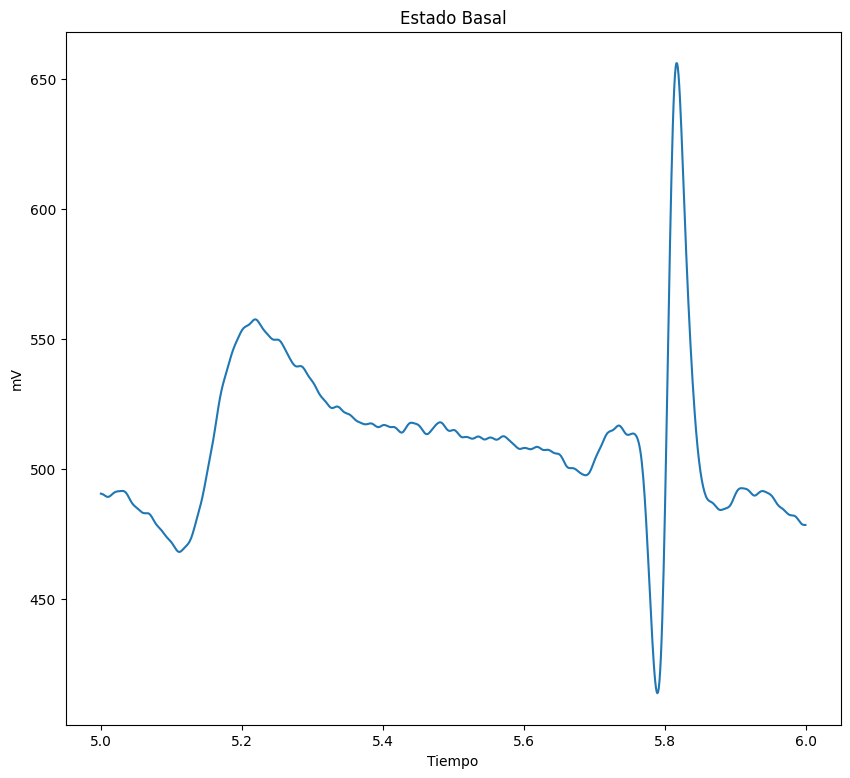

In [ ]:
plt.figure(figsize=(10,9)) #Modificamos el tamaño de la gráfica
plt.plot(t[5000:6000], y[5000:6000])
plt.title("Estado Basal")
plt.xlabel('Tiempo')
plt.ylabel('mV')

Text(0, 0.5, 'mV')

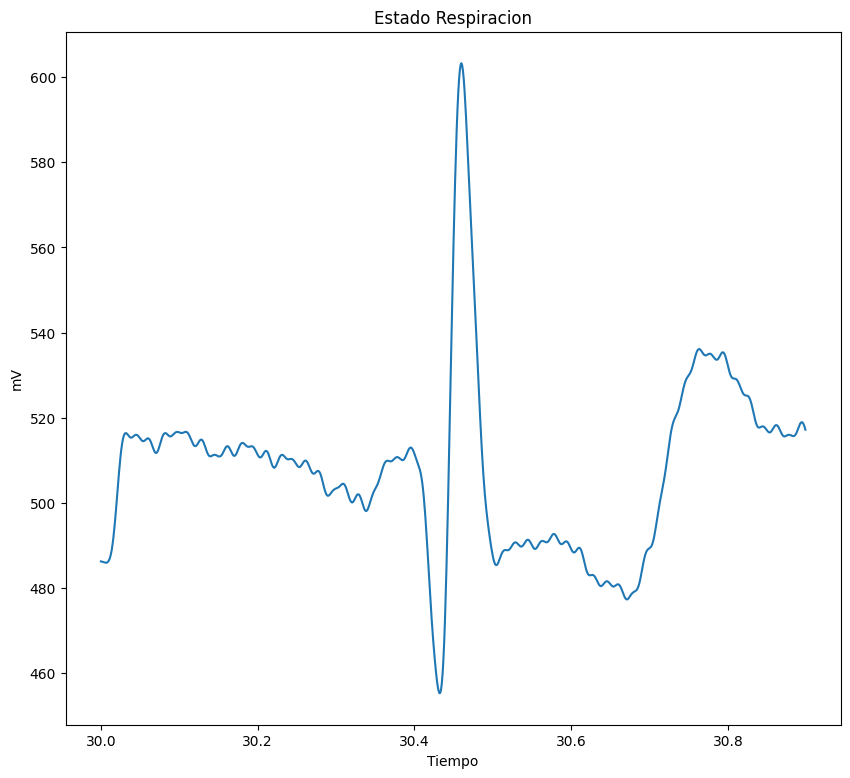

In [ ]:
plt.figure(figsize=(10,9)) #Modificamos el tamaño de la gráfica
plt.plot(t[30000:30900], y[30000:30900])
plt.title("Estado Respiracion")
plt.xlabel('Tiempo')
plt.ylabel('mV')

Text(0, 0.5, 'mV')

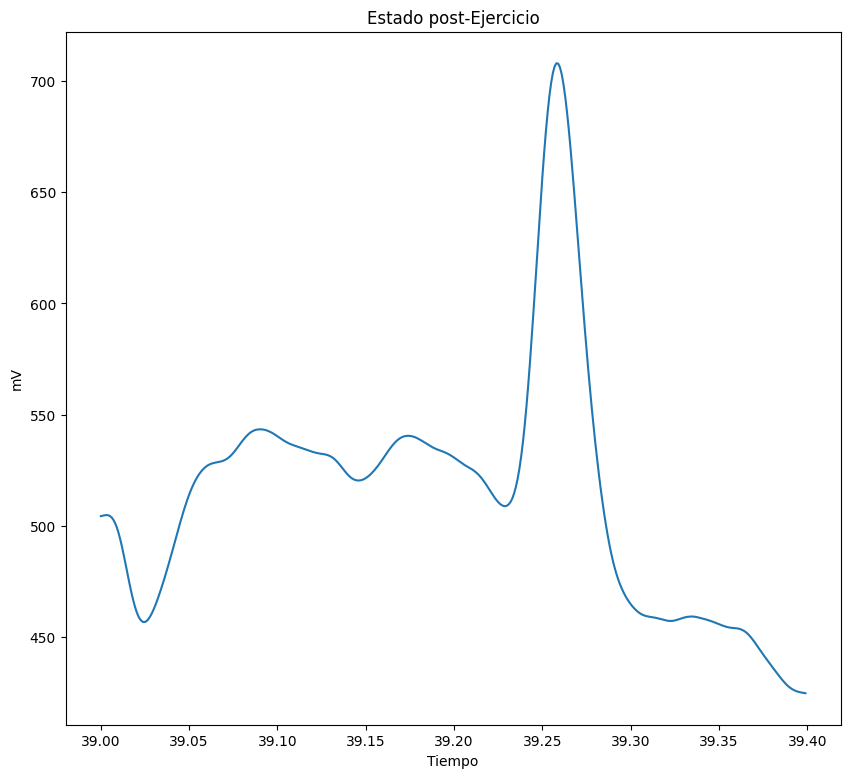

In [ ]:
plt.figure(figsize=(10,9)) #Modificamos el tamaño de la gráfica
plt.plot(t[39000:39400], y[39000:39400])
plt.title("Estado post-Ejercicio")
plt.xlabel('Tiempo')
plt.ylabel('mV')

## Aplicando filtro IIR
Se aplican los parámetros dado por la guía de laboratorio.
+ Wp = 94 rad/s
+ Ws = 157 rad/s

In [ ]:
wp=94
ws=157

N_ord, Wc= signal.buttord(wp, ws, gpass=3, gstop=40, analog=True) #gpass=loss in passband edge frecuencies, gstop= attenuation in stopband edge frecuencies 
fc = np.round(Wc/(2*np.pi) ,2) 

print(f"Orden del filtro: {N_ord}")
print(f"Frecuencia de corte calculada: {fc} hz")

Orden del filtro: 9
Frecuencia de corte calculada: 14.96 hz


In [ ]:
# Funcion de transferencia del filtro pasa bajo analogico
b,a = signal.butter(N_ord, Wc, 'lowpass', True, 'ba')

#np.set_printoptions(precision=3)
b,a

(array([5.74356979e+17]),
 array([1.00000000e+00, 5.41467262e+02, 1.46593398e+05, 2.59043475e+07,
        3.28154395e+09, 3.08546525e+11, 2.15327728e+13, 1.07727500e+15,
        3.51778456e+16, 5.74356979e+17]))

Text(0, 0.5, 'Magnitud (db)')

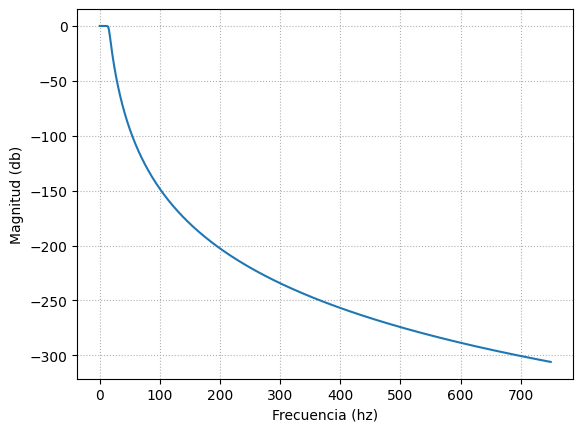

In [ ]:
# Respuesta en frecuencia del filtro analogico
Fmax=750
F_freqs = np.linspace(0,Fmax,1000)
W_freqs = 2*np.pi*F_freqs  #Angular frecuences

W_freqs, H = signal.freqs(b,a,W_freqs)
Hm=np.abs(H)
plt.plot(F_freqs, 20 * np.log10(Hm))
plt.grid(linestyle=":")
plt.xlabel("Frecuencia (hz)")
plt.ylabel("Magnitud (db)")

Transformada bilineal de H(s) a H(z)

Text(0, 0.5, 'Magnitud (db)')

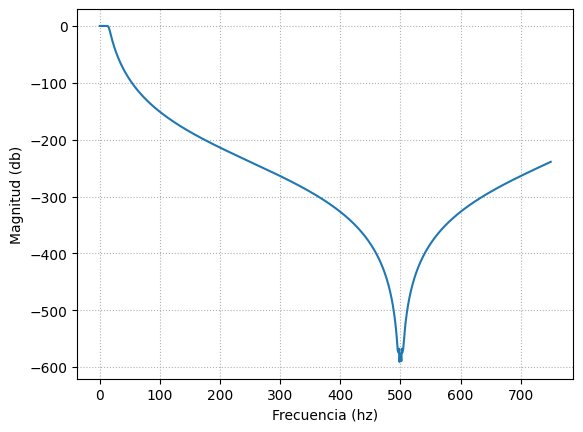

In [ ]:
bd, ad = signal.bilinear(b,a,Fs)
Wz, Hd = signal.freqz(bd, ad, W_freqs/Fs)

Hdm = np.abs(Hd)
plt.plot(F_freqs, 20 * np.log10(Hdm))
plt.grid(linestyle=":")
plt.xlabel("Frecuencia (hz)")
plt.ylabel("Magnitud (db)")

In [ ]:
# Filtrando la señal
y_1 = signal.lfilter(bd,ad, Datos)

### Visualización de la señal filtrado con IIR

Text(0, 0.5, 'mV')

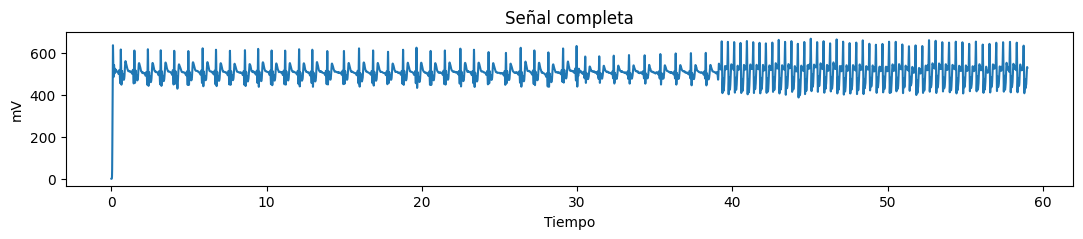

In [ ]:
plt.figure(figsize=(13,2)) #Modificamos el tamaño de la gráfica
plt.plot(t, y_1)
plt.title("Señal completa")
plt.xlabel('Tiempo')
plt.ylabel('mV')

Se presentan la gráfica de la señal cada estado. 

Text(0, 0.5, 'mV')

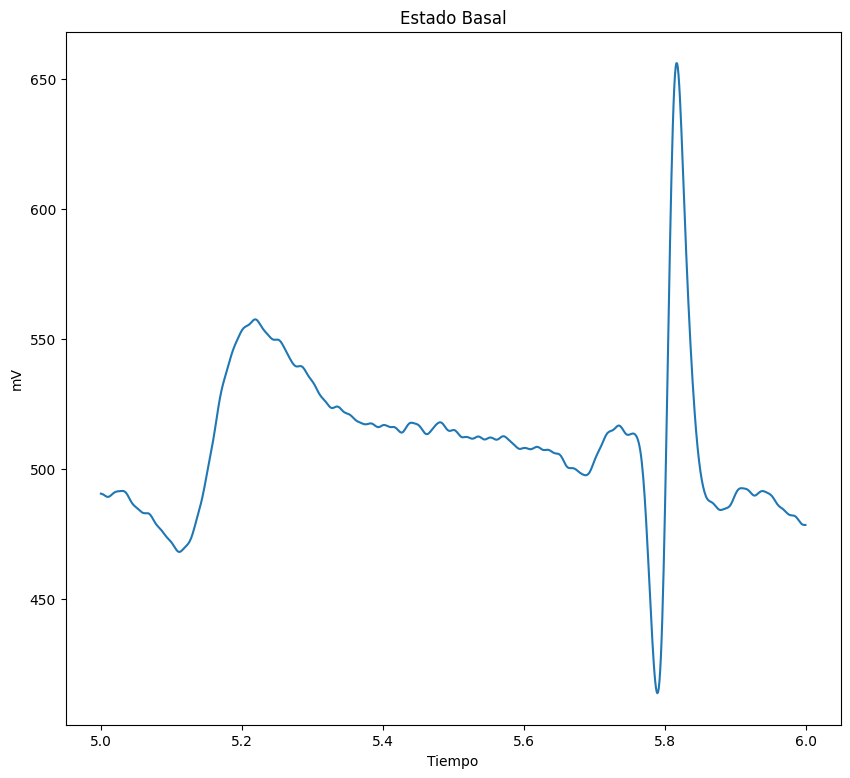

In [ ]:
plt.figure(figsize=(10,9)) #Modificamos el tamaño de la gráfica
plt.plot(t[5000:6000], y[5000:6000])
plt.title("Estado Basal")
plt.xlabel('Tiempo')
plt.ylabel('mV')

Text(0, 0.5, 'mV')

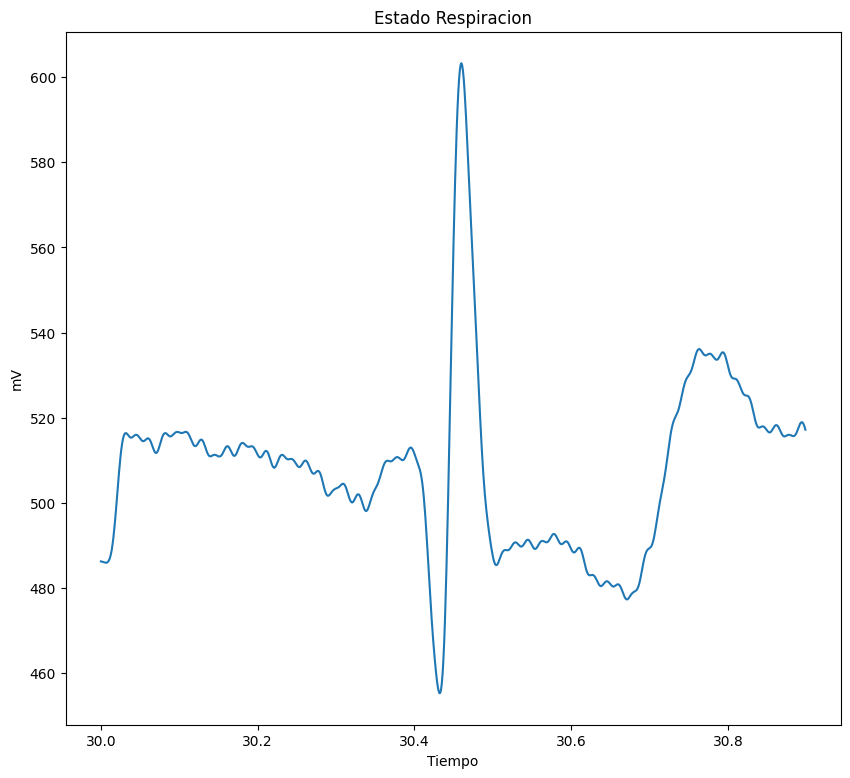

In [ ]:
plt.figure(figsize=(10,9)) #Modificamos el tamaño de la gráfica
plt.plot(t[30000:30900], y[30000:30900])
plt.title("Estado Respiracion")
plt.xlabel('Tiempo')
plt.ylabel('mV')

Text(0, 0.5, 'mV')

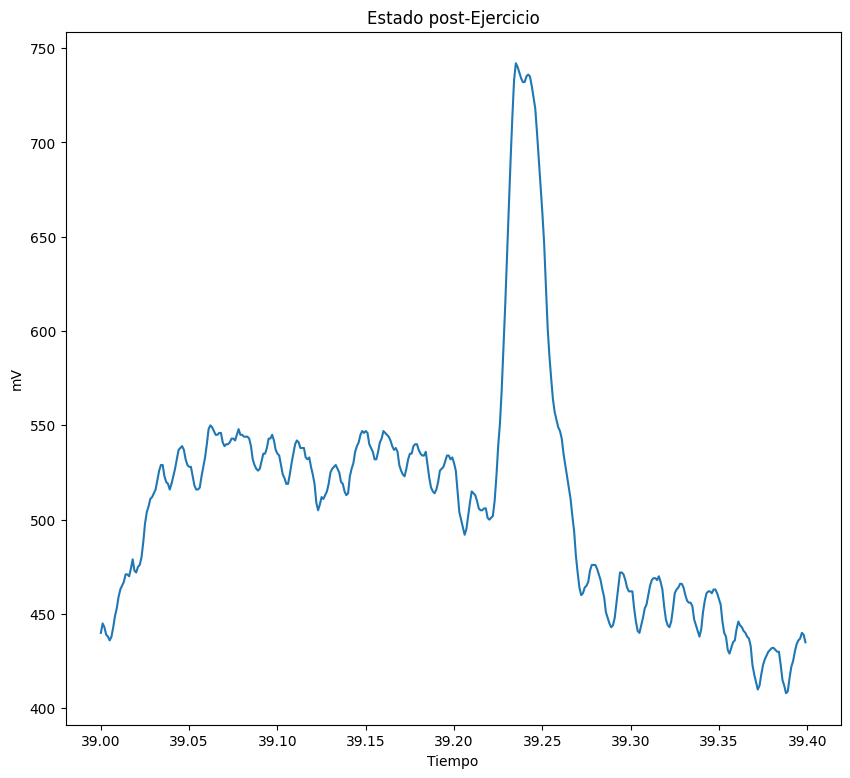

In [ ]:
plt.figure(figsize=(10,9)) #Modificamos el tamaño de la gráfica
plt.plot(t[39000:39400], Datos[39000:39400])
plt.title("Estado post-Ejercicio")
plt.xlabel('Tiempo')
plt.ylabel('mV')